# Using a sequential model

In [5]:
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from __future__ import print_function
import matplotlib.pyplot as plt

In [6]:
# get MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28

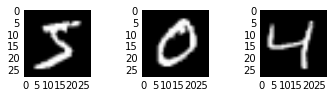

In [7]:
# display a few training images
plt.subplot(331)
plt.imshow(x_train[0].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(x_train[1].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(x_train[2].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [8]:
input_shape = img_rows * img_cols

# convert the 3-d arrays into matrices. 28x28 images are flattened into length 784 vectors.
x_train = x_train.reshape(60000, input_shape)
x_test = x_test.reshape(10000, input_shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# convert the grayscale values from integers ranging between 0 to 255 into floating point values ranging between 0 and 1.
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [9]:
# one-hot encode the y integer vectors into binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_shape,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=RMSprop(), metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 15s - loss: 0.2492 - acc: 0.9232 - val_loss: 0.1052 - val_acc: 0.9672
Epoch 2/15
60000/60000 [==============================] - 18s - loss: 0.1049 - acc: 0.9685 - val_loss: 0.0823 - val_acc: 0.9747
Epoch 3/15
60000/60000 [==============================] - 20s - loss: 0.0761 - acc: 0.9769 - val_loss: 0.0830 - val_acc: 0.9764
Epoch 4/15
60000/60000 [==============================] - 18s - loss: 0.0605 - acc: 0.9815 - val_loss: 0.0776 - val_acc: 0.9783
Epoch 5/15
60000/60000 [==============================] - 18s - loss: 0.0507 - acc: 0.9844 - val_loss: 0.0764 - val_acc: 0.9790
Epoch 6/15
60000/60000 [==============================] - 18s - loss: 0.0434 - acc: 0.9870 - val_loss: 0.0830 - val_acc: 0.9813
Epoch 7/15
60000/60000 [==============================] - 18s - loss: 0.0387 - acc: 0.9885 - val_loss: 0.0856 - val_acc: 0.9808
Epoch 8/15
60000/60000 [==============================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


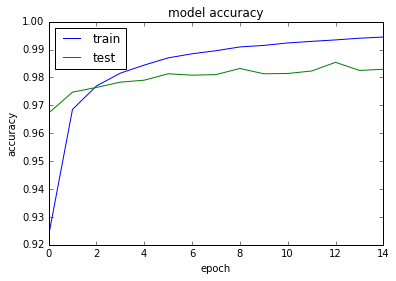

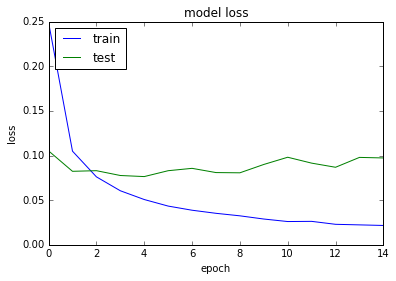

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0972796069087
Test accuracy: 0.9829


In [16]:
classes = model.predict_classes(x_test, batch_size=1)
print(classes)

 9978/10000 [============================>.] - ETA: 0s[7 2 1 ..., 4 5 6]


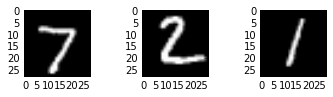

In [18]:
# display a few test images
plt.subplot(331)
plt.imshow(x_test[0].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(x_test[1].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(x_test[2].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()